In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [20]:
filename ='adult.data.csv'
names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']
dataset = read_csv(filename, names=names)

In [4]:
print(dataset.shape)
print(dataset.head(20))

(32561, 15)
    age          workclass  fnlwgt      education  education-num  \
0    39          State-gov   77516      Bachelors             13   
1    50   Self-emp-not-inc   83311      Bachelors             13   
2    38            Private  215646        HS-grad              9   
3    53            Private  234721           11th              7   
4    28            Private  338409      Bachelors             13   
5    37            Private  284582        Masters             14   
6    49            Private  160187            9th              5   
7    52   Self-emp-not-inc  209642        HS-grad              9   
8    31            Private   45781        Masters             14   
9    42            Private  159449      Bachelors             13   
10   37            Private  280464   Some-college             10   
11   30          State-gov  141297      Bachelors             13   
12   23            Private  122272      Bachelors             13   
13   32            Private  205019  

In [5]:
print(dataset.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [6]:
print(dataset.groupby('class').size())

class
 <=50K    24720
 >50K      7841
dtype: int64


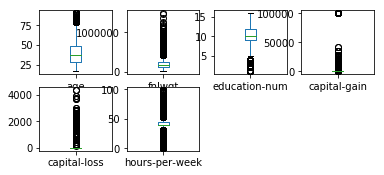

In [7]:
dataset.plot(kind='box',subplots=True,layout=(3,4),sharex=False,sharey=False)
pyplot.show()

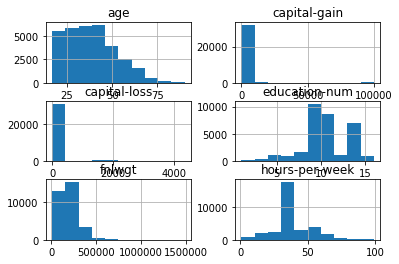

In [8]:
dataset.hist()
pyplot.show()

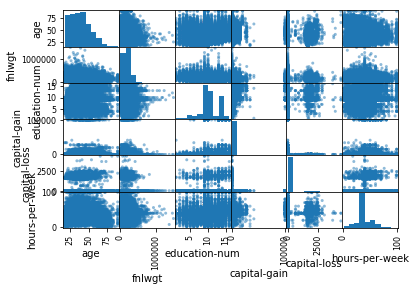

In [9]:
scatter_matrix(dataset)
pyplot.show()

In [10]:
correlations = dataset.corr(method = 'pearson')
print(correlations)

                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education-num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital-gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital-loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours-per-week  0.068756 -0.018768       0.148123      0.078409      0.054256   

                hours-per-week  
age                   0.068756  
fnlwgt               -0.018768  
education-num         0.148123  
capital-gain          0.078409  
capital-loss          0.054256  
hours-per-week        1.000000  


In [11]:
array = dataset.values
print(array)

[[39 ' State-gov' 77516 ... 40 ' United-States' ' <=50K']
 [50 ' Self-emp-not-inc' 83311 ... 13 ' United-States' ' <=50K']
 [38 ' Private' 215646 ... 40 ' United-States' ' <=50K']
 ...
 [58 ' Private' 151910 ... 40 ' United-States' ' <=50K']
 [22 ' Private' 201490 ... 20 ' United-States' ' <=50K']
 [52 ' Self-emp-inc' 287927 ... 40 ' United-States' ' >50K']]


In [12]:
array2 = dataset._get_numeric_data().values
print(array2)

[[    39  77516     13   2174      0     40]
 [    50  83311     13      0      0     13]
 [    38 215646      9      0      0     40]
 ...
 [    58 151910      9      0      0     40]
 [    22 201490      9      0      0     20]
 [    52 287927      9  15024      0     40]]


In [13]:
X = array2[:,0:14]
Y=array[:,14]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

In [13]:
dataset.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7767541839398127
[[4537  414]
 [1040  522]]
             precision    recall  f1-score   support

      <=50K       0.81      0.92      0.86      4951
       >50K       0.56      0.33      0.42      1562

avg / total       0.75      0.78      0.76      6513



In [15]:
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7701520036849379
[[4193  758]
 [ 739  823]]
             precision    recall  f1-score   support

      <=50K       0.85      0.85      0.85      4951
       >50K       0.52      0.53      0.52      1562

avg / total       0.77      0.77      0.77      6513



In [17]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.798181 (0.008683)
LDA: 0.802250 (0.007844)
KNN: 0.775837 (0.011157)
CART: 0.767430 (0.010222)
NB: 0.794610 (0.009193)


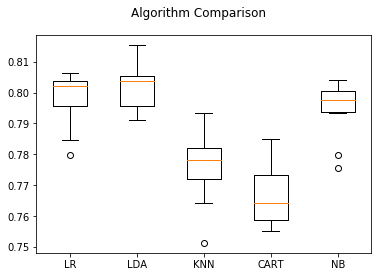

In [18]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [25]:
#TESTDATA

filename2 ='adult.test.csv'
testdataset = read_csv(filename2, names=names)

In [26]:
print(testdataset.shape)

(16281, 15)


In [39]:
tarray=testdataset.values
tarray2 = testdataset._get_numeric_data().values
X = tarray2[:,0:6]
Y = tarray[:,14]
validation_size = 1
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

In [41]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[1]]
             precision    recall  f1-score   support

     <=50K.       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         1



In [42]:
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[1]]
             precision    recall  f1-score   support

     <=50K.       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         1

